📉 Mean Squared Error (MSE): 271224501.17844456


/var/folders/1d/s91wgj8s6418wvztgc1kff_m0000gn/T/ipykernel_1892/2152616702.py:46: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


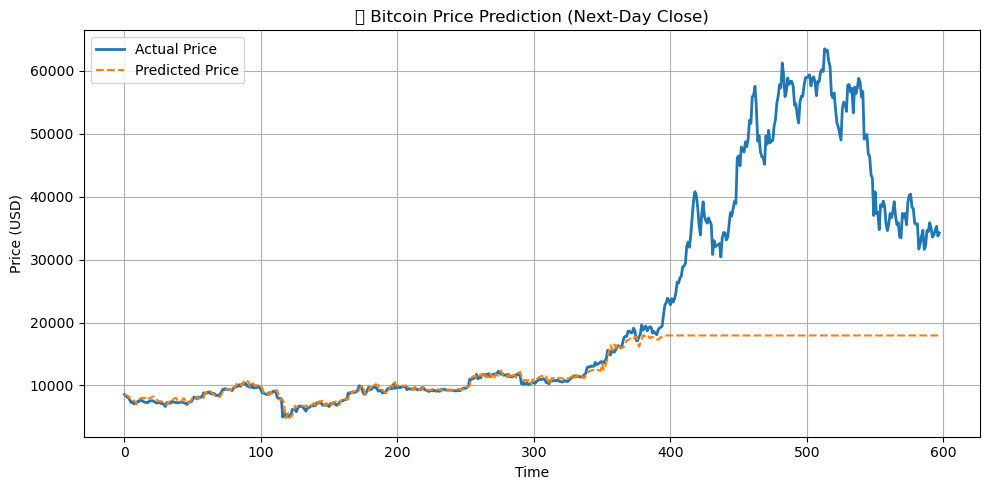

In [7]:
# Crypto Price Prediction using Machine Learning

# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Step 2: Load Local Dataset
df = pd.read_csv('/Users/mac/Desktop/crypto dataset/coin_Bitcoin.csv')  # Adjust path if needed

# Step 3: Select Relevant Features
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
df.dropna(inplace=True)

# Step 4: Create Target Column - Tomorrow's Close Price
df['Tomorrow'] = df['Close'].shift(-1)
df.dropna(inplace=True)

# Step 5: Prepare Features (X) and Target (y)
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Tomorrow']

# Step 6: Split into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 7: Train Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 8: Predict and Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("📉 Mean Squared Error (MSE):", mse)

# Step 9: Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual Price", linewidth=2)
plt.plot(y_pred, label="Predicted Price", linestyle="dashed")
plt.title("📈 Bitcoin Price Prediction (Next-Day Close)")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

